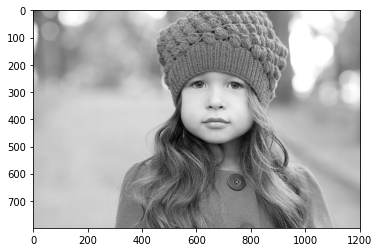

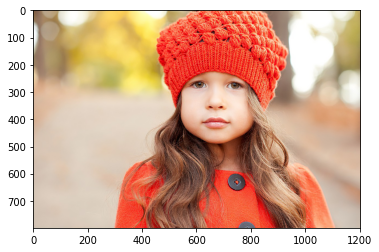

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

color_img = np.array(Image.open('img.jpg'))
gray_img = np.average(color_img, axis=2)
plt.imshow(gray_img, cmap='gray')
plt.show()
plt.imshow(color_img)
plt.show()

In [6]:
svd = np.linalg.svd(gray_img)
ind = np.argpartition(svd[1], -20)[-20:]
compressed_img = []
for i in range(20):
    u = svd[0][:,ind[i]].reshape([-1,1])
    v = svd[2][ind[i],:].reshape([-1,1])
    sigma = svd[1][ind[i]]
    compressed_img.append((u,sigma,v))

In [7]:
print('Stored size in memory is : '
      +str(len(compressed_img))
      +' * ('+str(compressed_img[0][0].shape[0])
      +' + 1 + '
      +str(compressed_img[0][2].shape[0])
      +') = '
      + str(len(compressed_img)
          *(compressed_img[0][0].shape[0]+1+compressed_img[0][2].shape[0])))

print('Initial Image Size : '
     + str(compressed_img[0][0].shape[0])
     + '*'
     + str(compressed_img[0][2].shape[0])
     + ' = '
     + str(compressed_img[0][0].shape[0]*compressed_img[0][2].shape[0]))

print('Compression ratio : ' 
      + str(compressed_img[0][0].shape[0]*compressed_img[0][2].shape[0])
      + ' / '
      + str(len(compressed_img)
          *(compressed_img[0][0].shape[0]+1+compressed_img[0][2].shape[0]))
      + ' = '
      + str(compressed_img[0][0].shape[0]*compressed_img[0][2].shape[0]/(
           len(compressed_img)
          *(compressed_img[0][0].shape[0]+1+compressed_img[0][2].shape[0]))))

Stored size in memory is : 20 * (799 + 1 + 1202) = 40040
Initial Image Size : 799*1202 = 960398
Compression ratio : 960398 / 40040 = 23.985964035964034


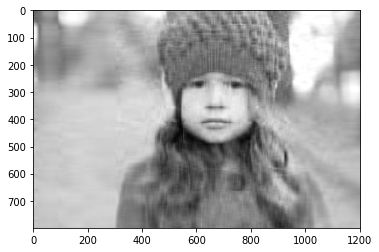

In [8]:
img = np.zeros_like(gray_img)
for i in range(len(compressed_img)):
    u,sigma,v = compressed_img[i]
    img += sigma*(u@v.T)
img = np.maximum(img, 0)
img = np.minimum(img, 255)
plt.imshow(img/255, cmap='gray')

In [10]:
svd = [np.linalg.svd(color_img[...,j]) for j in range(3)]
ind = [np.argpartition(svd[j][1], -20)[-20:] for j in range(3)]
compressed_img = []
for i in range(20):
    u = [svd[j][0][:,ind[j][i]].reshape([-1,1]) for j in range(3)]
    v = [svd[j][2][ind[j][i],:].reshape([-1,1]) for j in range(3)]
    sigma = [svd[j][1][ind[j][i]] for j in range(3)]
    compressed_img.append((u,sigma,v))

In [11]:
print('Stored size in memory is : 3 * '
      +str(len(compressed_img))
      +' * ('+str(compressed_img[0][0][0].shape[0])
      +' + 1 + '
      +str(compressed_img[0][2][0].shape[0])
      +') = '
      + str(3*len(compressed_img)
          *(compressed_img[0][0][0].shape[0]+1+compressed_img[0][2][0].shape[0])))

print('Initial Image Size : 3 * '
     + str(compressed_img[0][0][0].shape[0])
     + ' * '
     + str(compressed_img[0][2][0].shape[0])
     + ' = '
     + str(3*compressed_img[0][0][0].shape[0]*compressed_img[0][2][0].shape[0]))

print('Compression ratio : ' 
      + str(3*compressed_img[0][0][0].shape[0]*compressed_img[0][2][0].shape[0])
      + ' / '
      + str(3*len(compressed_img)
          *(compressed_img[0][0][0].shape[0]+1+compressed_img[0][2][0].shape[0]))
      + ' = '
      + str(compressed_img[0][0][0].shape[0]*compressed_img[0][2][0].shape[0]/(
           len(compressed_img)
          *(compressed_img[0][0][0].shape[0]+1+compressed_img[0][2][0].shape[0]))))

Stored size in memory is : 3 * 20 * (799 + 1 + 1202) = 120120
Initial Image Size : 3 * 799 * 1202 = 2881194
Compression ratio : 2881194 / 120120 = 23.985964035964034


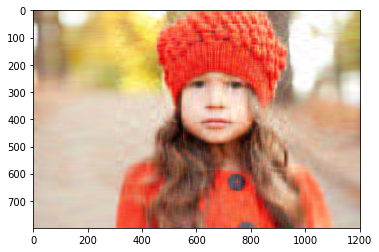

In [12]:
img = np.zeros_like(color_img, dtype='float')
for i in range(len(compressed_img)):
    for j in range(3):       
        u,sigma,v = compressed_img[i]
        img[...,j] += sigma[j]*(u[j]@v[j].T)
img = np.maximum(img, 0)
img = np.minimum(img, 255)
plt.imshow(img/255)

119805

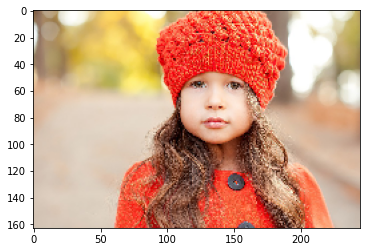

In [31]:
plt.imshow(color_img)
im = Image.fromarray(color_img)
im = im.resize((int(im.size[0]/4.89), int(im.size[1]/4.89)), Image.Resampling.NEAREST )
plt.imshow(im)
3*im.size[0]*im.size[1]